In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *

In [3]:
nx,ny = 2,2 # board size

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, 64),
    np.linspace(-ny/2, ny/2, 64),
)
board = np.stack([xx, yy], axis=-1)
zz = np.zeros(list(board.shape[:-1])+[3])

In [4]:
f = 1
orientation_offset = 0
center = np.zeros(2)
non_negative = False

In [5]:
gridmodule = GridModule(center,orientation_offset,f,non_negative)

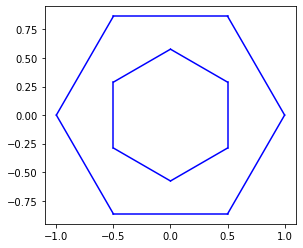

In [6]:
fig,ax = plt.subplots()
gridmodule.plot(fig,ax)

(-0.55, 0.55, -0.47631397208144144, 0.47631397208144133)

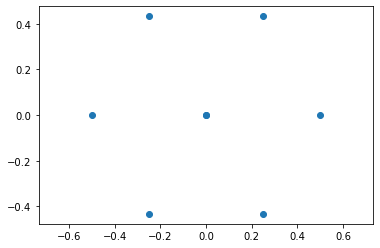

In [7]:
phases = gridmodule.inner_hexagon.hpoints
phases = gridmodule.outer_hexagon.hpoints / 2
phases = np.concatenate([phases, 2*[gridmodule.center]],axis=0)
gridmodule.init_module(phases)

plt.scatter(*phases.T)
plt.axis('equal')

Standard Deviation = 7.752020968092303e-16 -> If small, then no spatial variation!


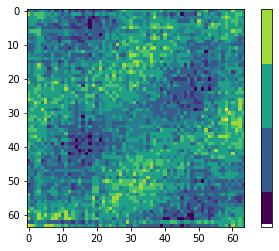

In [8]:
plt.imshow(np.sum(gridmodule(board),axis=0))
plt.colorbar()
print("Standard Deviation =", np.std(np.sum(gridmodule(board),axis=0)), "-> If small, then no spatial variation!")

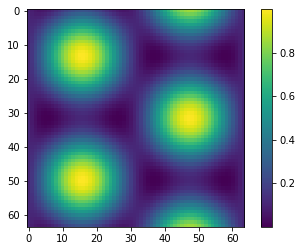

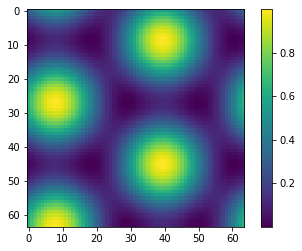

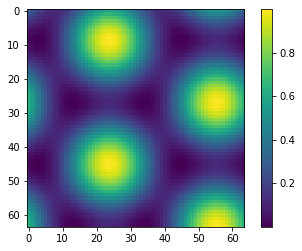

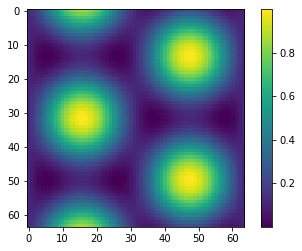

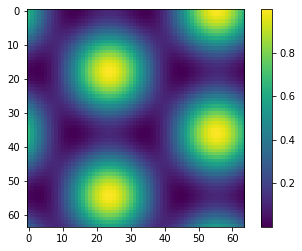

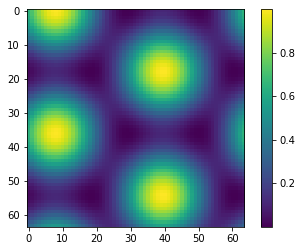

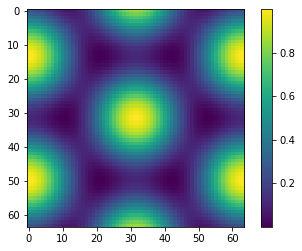

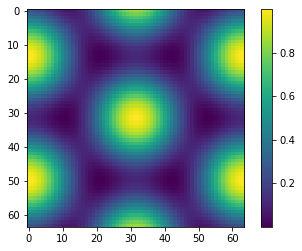

In [9]:
for ratemap in gridmodule(board):
    plt.imshow(ratemap)
    plt.colorbar()
    plt.show()